In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib import collections as mc
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from scipy.sparse.csgraph import dijkstra
MAX=float('inf')

In [2]:
def readGraph(path):
    data=np.loadtxt(path,dtype='int', delimiter=' '); 
    return data
def maxtrixGraph(data):
    
    maxPoint=0;
    for item in data:
        maxPoint=max(maxPoint,max(item[0],item[1]));
    print(maxPoint);
    matrix=np.zeros([maxPoint+1,maxPoint+1]); 
    for i in range(maxPoint+1):
        for j in range(maxPoint+1):
            if i==j:
                matrix[i][j]=0;
            else:
                matrix[i][j]=MAX;
    n=len(data);
    row=np.zeros(n);
    col = np.zeros(n);
    data2 = np.zeros(n);
    i=0;
    for item in data:
        row[i]=item[0];
        col[i]=item[1];
        data2[i]=1;
        i=i+1;
        #matrix[item[0]][item[1]]=1;
        #matrix[item[1]][item[0]]=1;
    return row,col,data2,maxPoint;

In [3]:
def swap(t1, t2):
    return t2, t1

def dist(x,y):
    res=math.sqrt(((x[0]-y[0])**2)+((x[1]-y[1])**2));
    return res;
    

def dijkstra2(row2,col2,data2,maxPoint):
    row = np.array(row2);
    col=np.array(col2);
    data=np.array(data2);
    matrix=csc_matrix((data2, (row2, col2)), shape=(maxPoint+1, maxPoint+1)).toarray()
    graph = csr_matrix(matrix);
    #print(graph)
    dist_matrix, predecessors = dijkstra(csgraph=graph, directed=False, indices=np.arange(maxPoint+1), return_predecessors=True)
    #print(np.arange(maxPoint+1))
    #print(dist_matrix)
    return dist_matrix


In [4]:
def SGD(num_iter,row,col,data2,maxPoint):
    n=maxPoint+1
    dis=dijkstra2(row,col,data2,maxPoint);
    w=np.zeros((n,n));
    
    constraints = []
    w_min = float('inf')
    w_max = 0
    for i in range(len(w)):
        for j in range(i+1,len(w)):
            
            w[i][j]=dis[i][j];
            if w[i][j]==float('inf'):
                w[i][j]=0;
            elif w[i][j]==0:
                w[i][j]=0;
            else:
                w[i][j]=1/(dis[i][j]**2);
                w_min = min(w[i][j], w_min)
                w_max = max(w[i][j], w_max)
                constraints.append((i,j,w[i][j]))
                
            
            if dis[i][j]==float('inf'):
                dis[i][j]=0;
                
                
    epsilon = 0.1

    eta_max = 1/w_min
    eta_min = epsilon/w_max           
    lambd = np.log(eta_min / eta_max) / (num_iter - 1);
    eta = lambda t: eta_max*np.exp(lambd*t)
    
    schedule = []
    for i in range(num_iter):
        schedule.append(eta(i))
    plt.plot(schedule)
    
    
    #print(w);
    X=np.random.rand(n,2);
    stressArray=[];
    X=X*100
    Z=X.copy();
    minn=n;
    for i in range(len(w)):
        for j in range(len(w)):
            if w[i][j]!=0:
                minn=min(minn,w[i][j]);
    nn=1/minn;
    print(minn);
    lambe=0.1;
    #print(X);
    tmp=np.zeros((n,n));
    
    
    for c in schedule:
        # shuffle the relaxation order
        random.shuffle(constraints)
        constraints
        
        for i,j,ww in constraints:
            u = ww*c
            if (u > 1):
                u = 1
        
            tmpdis=dist(X[i],X[j]);
            r=((tmpdis-dis[i][j])/2)*((X[i]-X[j])/tmpdis);
            X[i]=X[i]-u*r;
            X[j]=X[j]+u*r;
         #tmp[i][j]=1;
    #for kk in range(num):
        #print(nn);
        #i=random.randint(0,n-1);
        #j=random.randint(0,n-1);
        #while i==j:
        #    j=random.randint(0,n-1);
        #if j<i:
        #    i,j=swap(i,j);
        #if i==n or j==n:
        #    continue
        #for o in range(len(dis)):
          #  for p in range(o+1,len(dis)):
          #      tmp[o][p]=0;
        #for o in range(len(dis)):
           # for p in range(o+1,len(dis)):
                #i=random.randint(0,n-1);
                #j=random.randint(0,n-1);
                #while i==j:
                #    j=random.randint(0,n-1);
                #if j<i:
                #    i,j=swap(i,j);
                #if i==n or j==n:
                #    continue
                #if tmp[i][j]==1:
                #    continue;
                #if i!=j and tmp[i][j]==0:
        #            u=w[o][p]*nn;
        #            if u>1:
         #               u=1;
         #           tmpdis=dist(X[o],X[p]);
         #           r=((tmpdis-dis[o][p])/2)*((X[o]-X[p])/tmpdis);
         #           X[o]=X[o]-u*r;
         #           X[p]=X[p]+u*r;
         #           #tmp[i][j]=1;
        
        stress=0;
        for i in range(len(dis)):
            for j in range(i+1,len(dis)):
                if i!=j:
                    stress=stress+w[i][j]*((dist(X[i],X[j])-dis[i][j])**2);
        print(stress);
        stressArray.append(stress);
    #print(Z);
    return X,stressArray,Z;

In [5]:
file_name = 'bus1138.txt' 
data = readGraph(file_name);
row,col,data2,maxPoint=maxtrixGraph(data);
dijkstra2(row,col,data2,maxPoint);

1137


0.001040582726326743
142334.78341231417
138348.8111748574
130480.63193423142
134824.2392473227
139085.87595972428
130735.79911195682
121003.27010486642
128937.84334778748
125940.98935432841
123535.98607964882
113675.69894051558
97445.82115472261
96983.39382208609
85257.61337256247
82010.16164303705
75655.1033069531
66942.22183283922
61163.00006848701
59842.00737706909
55804.01451473448
52082.26287347652
50422.28741964859
48890.93496123465
46892.605050957616
45311.75288801386
44452.117193970116
43219.59326459405
42950.96975125817
42222.61673403496
42058.557914786325
41489.43460196563
41164.58579597338
40857.21739538818
40609.15710765092
40463.71718636019
40347.23171554913
40229.71245767006
40164.564283859276
40062.395829647525
40009.60342001367
39954.221881433696
39920.07846009174
39902.855160298066
39889.90236219989
39882.453272706654
39877.96793192284
39874.70546057486
39872.84966506857
39871.53352345905
39870.762906196855
[[59.1288153  51.991701  ]
 [59.33153494 51.31573657]
 [57.671

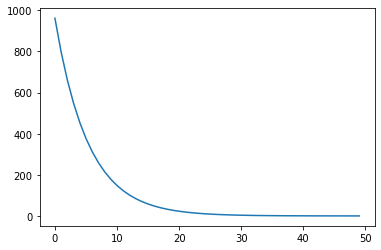

In [6]:
ans,stress,duizhao=SGD(50,row,col,data2,maxPoint);
print(ans);
print(duizhao);

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


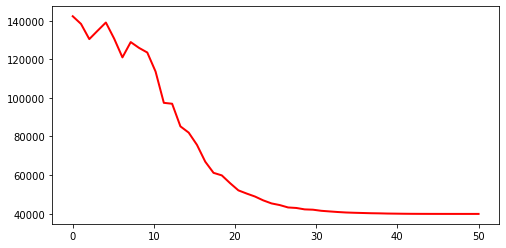

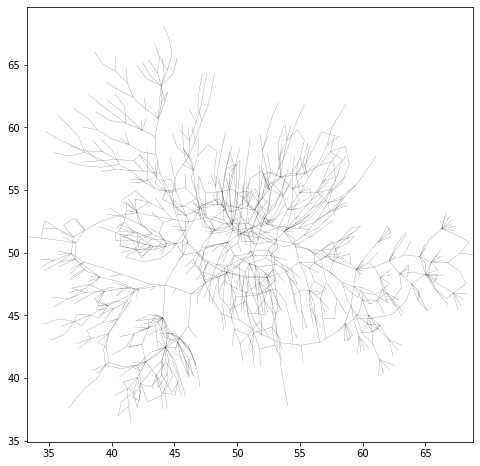

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


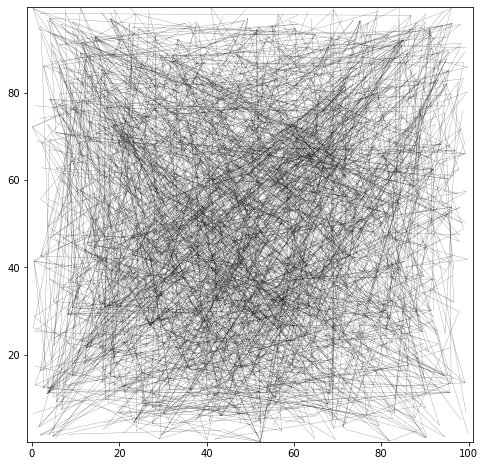

In [7]:
plt.figure(figsize=(8,4))
xa = np.linspace(0, len(stress), len(stress));
plt.plot(xa,stress,label="$sin(x)$",color="red",linewidth=2) 

X=ans;
plt.figure(figsize=(8,8))
plt.axis('equal')
ax = plt.axes()
ax.set_xlim(min(ans[:,0]), max(ans[:,0]))
ax.set_ylim(min(ans[:,1]), max(ans[:,1]))
lines = []
for item in data:
    lines.append([ans[item[0]],ans[item[1]]]);
lc = mc.LineCollection(lines, linewidths=.3, colors='#0000007f')
ax.add_collection(lc)
plt.show()


plt.figure(figsize=(8,8))
plt.axis('equal')
ax = plt.axes()
ax.set_xlim(min(duizhao[:,0]), max(duizhao[:,0]))
ax.set_ylim(min(duizhao[:,1]), max(duizhao[:,1]))
lines = []
for item in data:
    lines.append([duizhao[item[0]],duizhao[item[1]]]);
lc = mc.LineCollection(lines, linewidths=.3, colors='#0000007f')
ax.add_collection(lc)
plt.show()

In [8]:

for i in range(len(ans)):
    if ans[i][0]!=duizhao[i][0] or ans[i][1]!=duizhao[i][1]:
        print("nihao");

nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
nihao
